<a href="https://colab.research.google.com/github/Adamantia/covid19-mit-teamd004/blob/master/Covid19_Datathon_Team_d004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ### Imports


In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
from IPython.display import display, HTML
# Imports for accessing Datathon data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

## Covid Race data https://covidtracking.com/race 

In [0]:


url = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/Race%20Data%20-%20Tracker%20Commits.csv'

df = pd.read_csv(url)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Positives,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Deaths,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Negatives,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ethnicity,NaN,NaN,NaN,NaN,Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ethnicity,NaN,NaN,NaN,Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ethnicity,NaN,NaN,NaN,NaN
1,NaN,NaN,Update Time,Source,Update Time (Et),Last Check,Checker,DC,Total,Known White,Known Black,Known LatinX / Hispanic,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown,% Unk.,Total,Known White,Known Black,Known LatinX / Hispanic,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown,% Unk.,Known White,Known Black,Known LatinX / Hispanic,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown,% Unk.,NaN
2,20200510.0,AK,NaN,NaN,5/09 0:00,5/10 22:15,SAR,AFG,379,238,9,NaN,45,24,13,12,10,28,7%,35,305,39,10%,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,10,100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20200510.0,AL,NaN,NaN,5/10 0:00,5/10 22:24,SAR,AFG,9889,4333,3789,NaN,61,NaN,NaN,NaN,371,1334,13%,759,7266,1864,19%,393,194,178,NaN,3,NaN,NaN,NaN,5,9,2%,9,341,42,11%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20200510.0,AR,NaN,NaN,5/10 19:05,5/10 22:36,SAR,AFG,4012,1922,1322,NaN,44,9,53,19,152,300,8%,191,3747,74,2%,82,45,30,NaN,NaN,NaN,0,NaN,4,3,4%,NaN,NaN,82,100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Stats America DataSet


In [0]:
url_cali = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_california.xls'
url_illinois = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_illinois.xls'
url_massachusetts = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_massachusetts.xls'
url_new_jersey = 'https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_new_jersey.xls'
url_new_york ='https://raw.githubusercontent.com/Adamantia/covid19-mit-teamd004/master/statsamerica_dataset/datasets/dataset_new_york.xls'

#### California

In [0]:
data = pd.read_html(url_cali)
data[0]


,Unnamed: 0,"Alameda County, CA","Alpine County, CA","Amador County, CA","Butte County, CA","Calaveras County, CA","Colusa County, CA","Contra Costa County, CA","Del Norte County, CA","El Dorado County, CA","Fresno County, CA","Glenn County, CA","Humboldt County, CA","Imperial County, CA","Inyo County, CA","Kern County, CA","Kings County, CA","Lake County, CA","Lassen County, CA","Los Angeles County, CA","Madera County, CA","Marin County, CA","Mariposa County, CA","Mendocino County, CA","Merced County, CA","Modoc County, CA","Mono County, CA","Monterey County, CA","Napa County, CA","Nevada County, CA","Orange County, CA","Placer County, CA","Plumas County, CA","Riverside County, CA","Sacramento County, CA","San Benito County, CA","San Bernardino County, CA","San Diego County, CA","San Francisco County, CA","San Joaquin County, CA","San Luis Obispo County, CA","San Mateo County, CA","Santa Barbara County, CA","Santa Clara County, CA","Santa Cruz County, CA","Shasta County, CA","Sierra County, CA","Siskiyou County, CA","Solano County, CA","Sonoma County, CA","Stanislaus County, CA","Sutter County, CA","Tehama County, CA","Trinity County, CA","Tulare County, CA","Tuolumne County, CA","Ventura County, CA","Yolo County, CA","Yuba County, CA"
0,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview
1,Total Population 2019,1671329,1129,39752,219186,45905,21547,1153526,27812,192843,999101,28393,135558,181215,18039,900202,152940,64386,30573,10039107,157327,258826,17203,86749,277680,8841,14444,434061,137744,99755,3175692,398329,18807,2470546,1552058,62808,2180085,3338330,881549,762148,283111,766573,446499,1927852,273213,180080,3005,43539,447643,494336,550660,96971,65084,12285,466195,54478,846006,220500,78668
2,Population Growth or Decline 2010 to 2019,10.7 %,-3.9 %,4.4 %,-0.4 %,0.7 %,0.6 %,10.0 %,-2.8 %,6.5 %,7.4 %,1.0 %,0.7 %,3.8 %,-2.7 %,7.2 %,0.0 %,-0.4 %,-12.4 %,2.2 %,4.3 %,2.5 %,-5.7 %,-1.2 %,8.6 %,-8.7 %,1.7 %,4.6 %,0.9 %,1.0 %,5.5 %,14.3 %,-6.0 %,12.8 %,9.4 %,13.6 %,7.1 %,7.9 %,9.5 %,11.2 %,5.0 %,6.7 %,5.3 %,8.2 %,4.1 %,1.6 %,-7.3 %,-3.0 %,8.3 %,2.2 %,7.0 %,2.4 %,2.6 %,-10.9 %,5.4 %,-1.6 %,2.8 %,9.8 %,9.0 %
3,Households 2018,572870,299,14090,86797,17417,7113,392277,9799,69172,304624,10017,54267,44057,8083,267913,42735,25966,9493,3306109,44759,105258,7700,34090,79606,3660,4847,126052,49032,40904,1032373,140661,8047,718349,536029,17740,630633,1118980,359673,226727,105317,261969,144962,635525,95756,70473,1241,19257,149067,189339,172682,32360,24025,5796,136106,22427,271226,73510,26179
4,Labor Force (persons) 2019,844346,551,14900,99242,21428,10993,561757,9674,92022,450760,12997,62507,71411,8760,390999,57788,29158,9869,5121584,61945,139979,7612,38934,116226,3171,8508,222516,74004,48639,1623421,187932,7903,1104035,712394,31432,967719,1590591,583186,327077,140931,460044,217882,1053723,142277,74353,1326,17227,209527,259394,243454,45785,25650,4693,203980,21317,423390,108658,29997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,High School Graduate (includes equiv.),203838,225,8461,33611,9557,3225,136610,6131,28621,136851,5058,21615,26758,3883,147239,23540,13951,7444,1416482,24249,20858,3622,15925,40839,2185,2290,56133,17644,13945,368858,48289,3638,411949,225825,9440,352296,409272,84630,129211,37163,82174,49059,191695,28222,31314,620,8118,69822,67183,97071,14879,13319,3325,69974,1

#### Illinois


In [0]:
data1 = pd.read_html(url_illinois)
data1[0]

,Unnamed: 0,"Adams County, IL","Alexander County, IL","Bond County, IL","Boone County, IL","Brown County, IL","Bureau County, IL","Calhoun County, IL","Carroll County, IL","Cass County, IL","Champaign County, IL","Christian County, IL","Clark County, IL","Clay County, IL","Clinton County, IL","Coles County, IL","Cook County, IL","Crawford County, IL","Cumberland County, IL","DeKalb County, IL","De Witt County, IL","Douglas County, IL","DuPage County, IL","Edgar County, IL","Edwards County, IL","Effingham County, IL","Fayette County, IL","Ford County, IL","Franklin County, IL","Fulton County, IL","Gallatin County, IL","Greene County, IL","Grundy County, IL","Hamilton County, IL","Hancock County, IL","Hardin County, IL","Henderson County, IL","Henry County, IL","Iroquois County, IL","Jackson County, IL",...,"Mason County, IL","Massac County, IL","Menard County, IL","Mercer County, IL","Monroe County, IL","Montgomery County, IL","Morgan County, IL","Moultrie County, IL","Ogle County, IL","Peoria County, IL","Perry County, IL","Piatt County, IL","Pike County, IL","Pope County, IL","Pulaski County, IL","Putnam County, IL","Randolph County, IL","Richland County, IL","Rock Island County, IL","St. Clair County, IL","Saline County, IL","Sangamon County, IL","Schuyler County, IL","Scott County, IL","Shelby County, IL","Stark County, IL","Stephenson County, IL","Tazewell County, IL","Union County, IL","Vermilion County, IL","Wabash County, IL","Warren County, IL","Washington County, IL","Wayne County, IL","White County, IL","Whiteside County, IL","Will County, IL","Williamson County, IL","Winnebago County, IL","Woodford County, IL"
0,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,...,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview
1,Total Population 2019,65435,5761,16426,53544,6578,32628,4739,14305,12147,209689,32304,15441,13184,37562,50621,5150233,18667,10766,104897,15638,19465,922921,17161,6395,34008,21336,12961,38469,34340,4828,12969,51054,8116,17708,3821,6646,48913,27114,56750,...,13359,13772,12196,15437,34637,28414,33658,14501,50643,179179,20916,16344,15561,4177,5335,5739,31782,15513,141879,259686,23491,194672,6768,4951,21634,5342,44498,131803,16653,75758,11520,16844,13887,16215,13537,55175,690743,66597,282572,38459
2,Population Growth or Decline 2010 to 2019,-2.5 %,-30.1 %,-7.6 %,-1.1 %,-5.2 %,-6.7 %,-6.9 %,-7.0 %,-11.0 %,4.3 %,-7.2 %,-5.5 %,-4.6 %,-0.5 %,-6.0 %,-0.9 %,-5.8 %,-2.6 %,-0.3 %,-5.6 %,-2.6 %,0.7 %,-7.6 %,-4.9 %,-0.7 %,-3.6 %,-8.0 %,-2.8 %,-7.4 %,-13.6 %,-6.6 %,2.0 %,-4.0 %,-7.3 %,-11.6 %,-9.3 %,-3.1 %,-8.8 %,-5.8 %,...,-8.9 %,-10.7 %,-4.0 %,-6.1 %,5.1 %,-5.6 %,-5.3 %,-2.3 %,-5.3 %,-3.9 %,-6.4 %,-2.3 %,-5.3 %,-6.6 %,-13.4 %,-4.4 %,-5.1 %,-4.4 %,-3.8 %,-3.8 %,-5.7 %,-1.4 %,-10.3 %,-7.5 %,-3.3 %,-10.9 %,-6.7 %,-2.7 %,-6.5 %,-7.2 %,-3.6 %,-4.9 %,-5.6 %,-3.3 %,-7.7 %,-5.7 %,1.9 %,0.4 %,-4.3 %,-0.5 %
3,Households 2018,27300,2323,6218,18731,2087,13805,1805,6476,5024,82499,13939,6774,5638,14190,21139,1963070,7653,4322,37703,6663,7618,341823,7590,2776,13555,7616,5779,16135,14090,2314,5005,19398,3376,7420,1438,2990,20023,11779,23728,...,6027,6011,5198,6624,13349,11339,13864,5910,20901,73629,8323,6700,6527,1644,2173,2395,11873,6482,60294,103063,10002,83661,2836,1959,9203,2294,19609,54613,6669,31180,4896,6690,5975,7075,6082,23346,227848,27089,114608,14566
4,Labor Force (persons) 2019,32358,2050,7833,26377,2993,17392,23

#### Massachusetts

In [0]:
data2 = pd.read_html(url_massachusetts)
data2[0]

,Unnamed: 0,"Barnstable County, MA","Berkshire County, MA","Bristol County, MA","Dukes County, MA","Essex County, MA","Franklin County, MA","Hampden County, MA","Hampshire County, MA","Middlesex County, MA","Nantucket County, MA","Norfolk County, MA","Plymouth County, MA","Suffolk County, MA","Worcester County, MA"
0,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview
1,Total Population 2019,212990,124944,565217,17332,789034,70180,466372,160830,1611699,11399,706775,521202,803907,830622
2,Population Growth or Decline 2010 to 2019,-1.3 %,-4.8 %,3.1 %,4.8 %,6.2 %,-1.7 %,0.6 %,1.7 %,7.2 %,12.1 %,5.4 %,5.3 %,11.3 %,4.0 %
3,Households 2018,94292,55167,216618,6367,292659,30328,179043,58665,600032,3722,263551,186306,307870,307294
4,Labor Force (persons) 2019,115437,65320,304217,9650,429871,41318,230190,90937,929265,7661,395483,286588,461168,450332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,High School Graduate (includes equiv.),40194,27750,116818,3091,135741,14911,93236,23457,218287,1476,95171,99134,122750,158830
125,"Some College, No Degree",31666,16848,70051,2606,89103,9228,60147,14724,139357,1494,68162,65420,74331,97647
126,Associate Degree,15233,9043,35390,838,44103,5615,30507,9427,65854,527,36608,35254,25766,50938
127,Bachelor's Degree,40509,17408,69303,3185,126601,10480,51742,22816,303611,2381,139580,81944,135277,124040


#### New York

In [0]:
data2 = pd.read_html(url_new_york)
data2[0]

,Unnamed: 0,"Albany County, NY","Allegany County, NY","Bronx County, NY","Broome County, NY","Cattaraugus County, NY","Cayuga County, NY","Chautauqua County, NY","Chemung County, NY","Chenango County, NY","Clinton County, NY","Columbia County, NY","Cortland County, NY","Delaware County, NY","Dutchess County, NY","Erie County, NY","Essex County, NY","Franklin County, NY","Fulton County, NY","Genesee County, NY","Greene County, NY","Hamilton County, NY","Herkimer County, NY","Jefferson County, NY","Kings County, NY","Lewis County, NY","Livingston County, NY","Madison County, NY","Monroe County, NY","Montgomery County, NY","Nassau County, NY","New York County, NY","Niagara County, NY","Oneida County, NY","Onondaga County, NY","Ontario County, NY","Orange County, NY","Orleans County, NY","Oswego County, NY","Otsego County, NY","Putnam County, NY","Queens County, NY","Rensselaer County, NY","Richmond County, NY","Rockland County, NY","St. Lawrence County, NY","Saratoga County, NY","Schenectady County, NY","Schoharie County, NY","Schuyler County, NY","Seneca County, NY","Steuben County, NY","Suffolk County, NY","Sullivan County, NY","Tioga County, NY","Tompkins County, NY","Ulster County, NY","Warren County, NY","Washington County, NY","Wayne County, NY","Westchester County, NY","Wyoming County, NY","Yates County, NY"
0,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview
1,Total Population 2019,305506,46091,1418207,190488,76117,76576,126903,83456,47207,80485,59461,47581,44135,294218,918702,36885,50022,53383,57280,47188,4416,61319,109834,2559903,26296,62914,70941,741770,49221,1356924,1628706,209281,228671,460528,109777,384940,40352,117124,59493,98320,2253858,158714,476143,325789,107740,229863,155299,30999,17807,34016,95379,1476601,75432,48203,102180,177573,63944,61204,89918,967506,39859,24913
2,Population Growth or Decline 2010 to 2019,0.4 %,-5.8 %,2.4 %,-5.0 %,-5.2 %,-4.3 %,-5.9 %,-6.0 %,-6.5 %,-2.0 %,-5.8 %,-3.6 %,-8.0 %,-1.1 %,0.0 %,-6.3 %,-3.1 %,-3.9 %,-4.7 %,-4.1 %,-8.7 %,-5.0 %,-5.5 %,2.2 %,-2.9 %,-3.8 %,-3.4 %,-0.3 %,-2.0 %,1.3 %,2.7 %,-3.3 %,-2.6 %,-1.4 %,1.7 %,3.3 %,-5.9 %,-4.1 %,-4.4 %,-1.4 %,1.0 %,-0.4 %,1.6 %,4.5 %,-3.8 %,4.7 %,0.4 %,-5.3 %,-2.9 %,-3.5 %,-3.6 %,-1.1 %,-2.7 %,-5.7 %,0.6 %,-2.7 %,-2.7 %,-3.2 %,-4.1 %,1.9 %,-5.4 %,-1.7 %
3,Households 2018,126008,18009,499728,78594,31433,31251,52572,34373,20616,31395,25243,17685,19030,107347,387847,15425,19088,22439,23681,17117,1124,24583,43267,950856,10242,24383,26026,300796,19665,445517,758133,88211,90014,185624,44286,126776,16333,46032,23556,34847,779234,64563,166152,100005,41669,93876,53295,12559,7304,13522,40183,487981,27890,20045,39326,69539,27553,24009,36504,347332,15815,9029
4,Labor Force (persons) 2019,157444,19441,597677,83444,33884,35952,54550,35019,22080,36302,31181,22853,19117,144040,441291,16995,19614,22656,29736,20271,2214,27932,43941,1198160,11644,30726,32766,361254,22306,708118,911638,98786,101170,220549,55362,184985,17567,52960,28060,51230,1139397,81089,222319,155237,43294,118925,76028,14637,8085,16027,42520,778193,36653,22687,49361,87692,31299,27831,43835,484382,18131,11849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,High School Graduate (includes equiv.),49310,11052,255427,40079,20869,18306,32222,21581,13439,20505,13918,9850,12386,53655,17

#### New Jersey

In [0]:
data3 = pd.read_html(url_new_jersey)
data3[0]

,Unnamed: 0,"Atlantic County, NJ","Bergen County, NJ","Burlington County, NJ","Camden County, NJ","Cape May County, NJ","Cumberland County, NJ","Essex County, NJ","Gloucester County, NJ","Hudson County, NJ","Hunterdon County, NJ","Mercer County, NJ","Middlesex County, NJ","Monmouth County, NJ","Morris County, NJ","Ocean County, NJ","Passaic County, NJ","Salem County, NJ","Somerset County, NJ","Sussex County, NJ","Union County, NJ","Warren County, NJ"
0,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview,Overview
1,Total Population 2019,263670,932202,445349,506471,92039,149527,798975,291636,672391,124371,367430,825062,618795,491845,607186,501826,62385,328934,140488,556341,105267
2,Population Growth or Decline 2010 to 2019,-4.0 %,3.0 %,-0.8 %,-1.4 %,-5.4 %,-4.7 %,1.9 %,1.2 %,6.0 %,-3.1 %,0.3 %,1.9 %,-1.8 %,-0.1 %,5.3 %,0.1 %,-5.6 %,1.7 %,-5.9 %,3.7 %,-3.2 %
3,Households 2018,99874,338249,165496,187158,39904,50608,282502,104587,255429,47180,129873,284174,233874,180896,225270,163670,23908,117012,53361,188987,41350
4,Labor Force (persons) 2019,120728,482038,230589,253053,45947,65061,368748,149747,361189,64523,202885,439073,328661,256698,275023,242208,29180,171371,73963,276382,56060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,High School Graduate (includes equiv.),59511,153824,88538,104485,22758,40015,149777,65856,122015,18755,60605,146032,104602,69634,138021,113580,16680,45738,31645,107744,23753
125,"Some College, No Degree",37325,95317,60273,67857,13595,18407,90420,37836,62911,13632,39896,85334,73427,48015,84668,53133,8383,32288,20226,62424,14369
126,Associate Degree,13507,38657,26754,24438,5387,7301,30967,18046,20909,5730,13507,35948,31923,22920,32368,17578,4456,13839,8491,21741,6602
127,Bachelor's Degree,33951,197262,75466,69337,14407,10474,110505,41935,121756,27155,53329,143500,117766,106686,78983,62770,6318,67658,23865,78955,15832


### ** The info below is useful for us to connect with the Big Query project of Covid, so please do not delete**

## Setup - bigquery


Before running any queries using BigQuery, you need to first authenticate yourself by running the following cell. If you are running it for the first time, it will ask you to follow a link to log in using your Gmail account, and accept the data access requests to your profile. Once this is done, it will generate a string of verification code, which you should paste back to the cell below and press enter.

In [0]:
auth.authenticate_user()

In [0]:
project_id='mit-covid-19-datathon'
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id

In [0]:
# Read data from BigQuery into pandas dataframes.
def run_query(query):
  return pd.io.gbq.read_gbq(query, project_id=project_id, verbose=False, configuration={'query':{'useLegacySql': False}})

### Dataset: covid19_ecdc.covid_19_geographic_distribution_worldwide

In [28]:
df3 = run_query('''
SELECT  date, month, year, daily_confirmed_cases, daily_deaths, confirmed_cases, deaths, countries_and_territories, geo_id, pop_data_2018 FROM `bigquery-public-data.covid19_ecdc.covid_19_geographic_distribution_worldwide` LIMIT 1000 ''')
df3.head()

,date,month,year,daily_confirmed_cases,daily_deaths,confirmed_cases,deaths,countries_and_territories,geo_id,pop_data_2018
0,2019-12-31,12,2019,0,0,0,0,United_Arab_Emirates,AE,9630959.0
1,2019-12-31,12,2019,0,0,0,0,Afghanistan,AF,37172386.0
2,2019-12-31,12,2019,0,0,0,0,Armenia,AM,2951776.0
3,2019-12-31,12,2019,0,0,0,0,Austria,AT,8847037.0
4,2019-12-31,12,2019,0,0,0,0,Australia,AU,24992369.0


#### Dataset: Summary COVID-19 cases, aggregated by country/region and province/state. See the original source files here: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/

In [23]:
data_cssegi = run_query('''
SELECT country_region, date, confirmed, deaths, recovered FROM `bigquery-public-data.covid19_jhu_csse.summary` LIMIT 1000 ''')
data_cssegi

,country_region,date,confirmed,deaths,recovered
0,Japan,2020-01-30,11.0,NaN,1.0
1,Thailand,2020-01-30,14.0,NaN,5.0
2,South Korea,2020-01-30,4.0,NaN,NaN
3,Singapore,2020-01-30,10.0,NaN,NaN
4,Vietnam,2020-01-30,2.0,NaN,NaN
...,...,...,...,...,...
995,Republic of the Congo,2020-03-17,0.0,0.0,0.0
996,Republic of the Congo,2020-03-16,1.0,0.0,0.0
997,Uganda,2020-03-21,1.0,0.0,0.0
998,St. Martin,2020-03-09,2.0,0.0,0.0


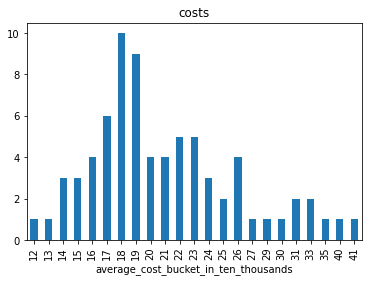

In [0]:
df = run_query('''
WITH costs AS (
  SELECT
    CAST(FLOOR(daily_confirmed_ / 10000) AS INT64) AS average_cost_bucket_in_ten_thousands
    FROM `bigquery-public-data.cms_medicare.inpatient_charges_2015`
    WHERE drg_definition = '001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC')
SELECT
  COUNT(average_cost_bucket_in_ten_thousands) AS number_of_procedures,
  average_cost_bucket_in_ten_thousands
  FROM costs
  GROUP BY average_cost_bucket_in_ten_thousands
  ORDER BY average_cost_bucket_in_ten_thousands ASC
''')

df.set_index('average_cost_bucket_in_ten_thousands').plot(title='costs',kind='bar',legend=False)